## Time Series Analysis and Forecasting on sales data

### Problem Statement : 
We are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

### Data :
Anonymized information about the 45 stores, indicating the type and size of store. The data contains additional data related to the store, department, and regional activity for the given dates.

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week



Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
sales = pd.read_csv('sales_data.csv')

In [3]:
sales.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [4]:
sales.shape

(421570, 17)

In [5]:
sales.tail()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,421565,45,98,2012-09-28,508.37,False,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221
421566,421566,45,98,2012-05-10,628.10,False,18.272222,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221
421567,421567,45,98,2012-12-10,1061.02,False,12.483333,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221
421568,421568,45,98,2012-10-19,760.01,False,13.594444,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221
421569,421569,45,98,2012-10-26,1076.80,False,14.916667,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,1,118221


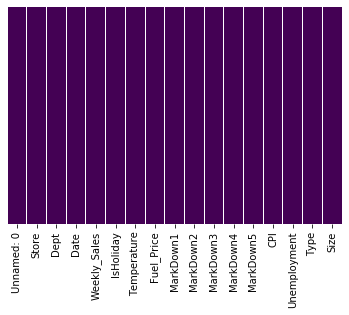

In [6]:
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**With the help of the above heatmap, we can interpret that there are no null values in the dataset. If a null value was present it would have been highlighted by yellow dashes in the viridis cmap.**

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Weekly_Sales  421570 non-null  float64
 5   IsHoliday     421570 non-null  bool   
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(5), object(1)
mem

**Since all columns have 421570 non-null values, there are no NaN/None values in this dataset.**

In [8]:
sales.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,210784.500000,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,121696.920828,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,105392.250000,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,210784.500000,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,316176.750000,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,421569.000000,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [9]:
remove = ['Unnamed: 0']
sales.drop(remove,axis=1,inplace=True)
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [10]:
print("Maximum Weekly Sales",sales['Weekly_Sales'].max())
print("Minimum Weekly Sales",sales['Weekly_Sales'].min())


Maximum Weekly Sales 693099.36
Minimum Weekly Sales -4988.94


In [11]:
print("Maximum Temperature :",sales['Temperature'].max())
print("Minimum Temperature :",sales['Temperature'].min())

Maximum Temperature : 37.85555555555555
Minimum Temperature : -18.922222222222224


If the store is closed or if the customers didn’t visit the store on that particular week, there is a financial loss for the store. That might be the reason why the sales are represented by the negative sign. I assume that the Temperature is scaled in Celsius and it is possible for a place to have -18°C.

In [12]:
print("Maximum Fuel Price :",sales['Fuel_Price'].max())
print("Minimum Fuel Price :",sales['Fuel_Price'].min())

Maximum Fuel Price : 4.468
Minimum Fuel Price : 2.472


In [13]:
sales['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [14]:
print("Departments : ")
dept = sales['Dept'].unique()
print(dept)
print("-"*30)
print("Number of departments :",len(dept))

Departments : 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
------------------------------
Number of departments : 81


**The departments are numbers from 1 to 99 but there are only 81 departments in total.**

In [15]:
print(sales['Type'].value_counts())

0    215478
1    163495
2     42597
Name: Type, dtype: int64


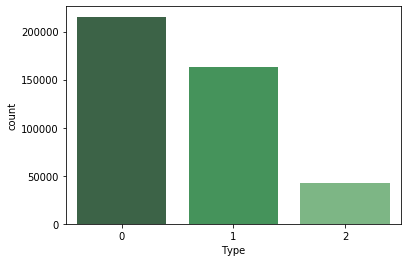

In [16]:
sns.countplot(x="Type",data=sales,palette="Greens_d")

From the countplot, it is found that most of the stores fall under the ‘Type 0’ category.

In [17]:
sales['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

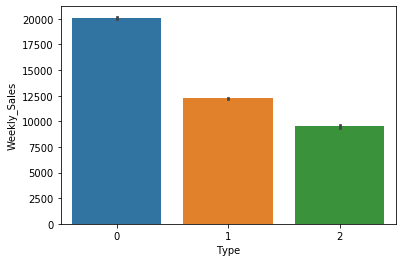

In [18]:
sns.barplot(x="Type",y="Weekly_Sales",data=sales)

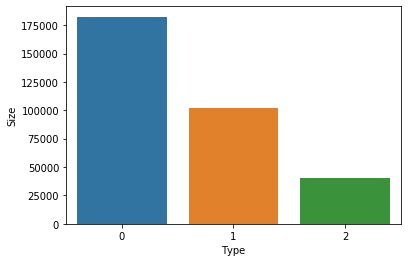

In [19]:
sns.barplot(x="Type",y="Size",data=sales)

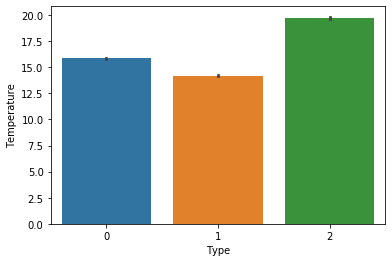

In [20]:
sns.barplot(x="Type",y="Temperature",data=sales)

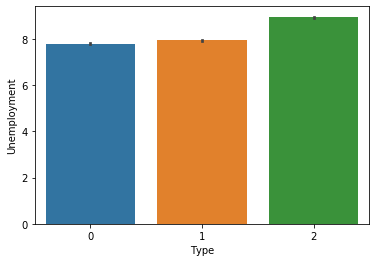

In [21]:
sns.barplot(x="Type",y="Unemployment",data=sales)

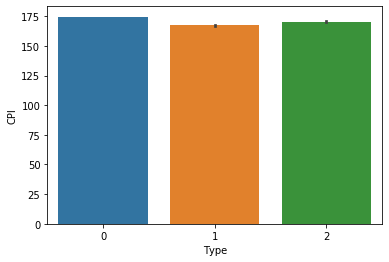

In [22]:
sns.barplot(x="Type",y="CPI",data=sales)

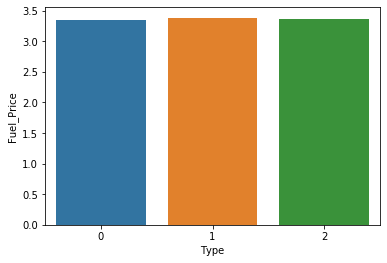

In [23]:
sns.barplot(x="Type",y="Fuel_Price",data=sales)

From the barplot, the Size of ‘Type 2’ stores is located in warmer places where the average temperature is around 20°C. ‘Type 1’ is located in cooler places where the average temperature is around 13°C.

[]

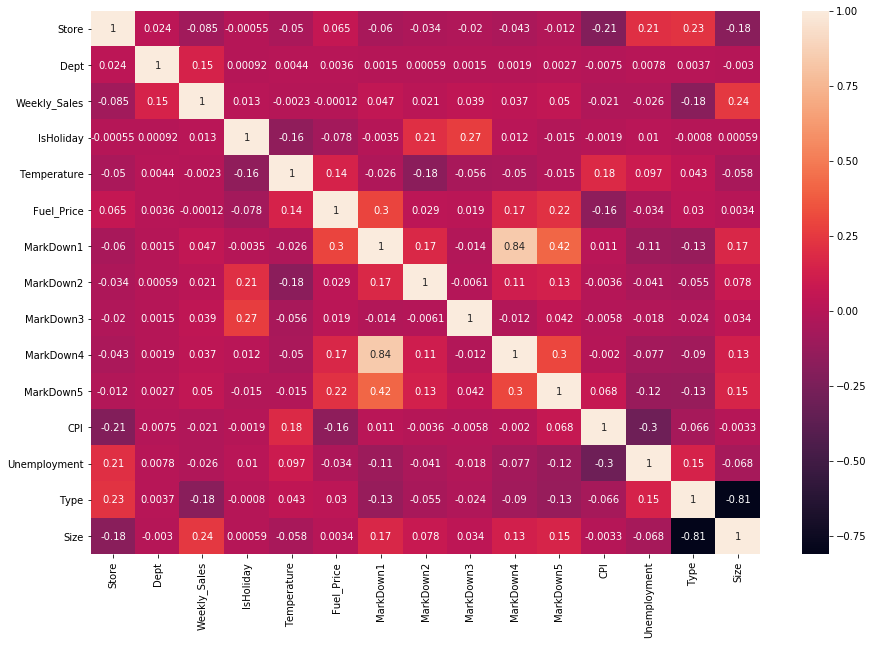

In [24]:
corr = sales.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

We know that each column will be perfectly correlated with each other. Heatmap helps us in finding the most correlated features by varying the colours. 

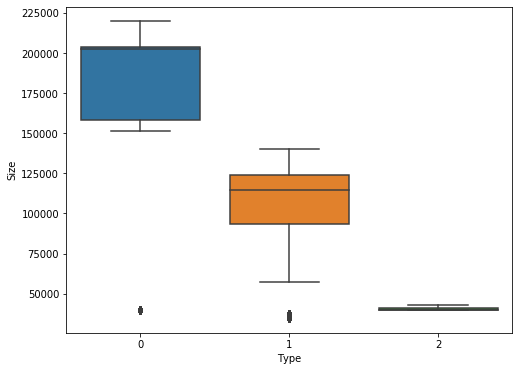

In [25]:
type_size = pd.concat([sales['Type'], sales['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=type_size)

In [26]:
cols = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Store','Dept','IsHoliday']
sales.drop(cols,axis=1,inplace=True)

In [27]:
sales.head()

,Date,Weekly_Sales
0,2010-05-02,24924.50
1,2010-12-02,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-05-03,21827.90


In [28]:
sales.shape

(421570, 2)

- - -

In [29]:
sales.to_csv(r'C:\Users\NEELESH\Desktop\Time Series Analysis\cleaned_sales_data.csv', index = False)

In [30]:
df = pd.read_csv('cleaned_sales_data.csv',index_col='Date',parse_dates=True)

In [31]:
df.head()

,Weekly_Sales
Date,
2010-05-02,24924.50
2010-12-02,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-05-03,21827.90


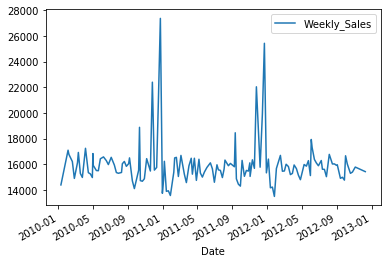

In [32]:
df = df.groupby('Date').mean()
df.plot()

**There is an increase in sales every year just before the new year.**

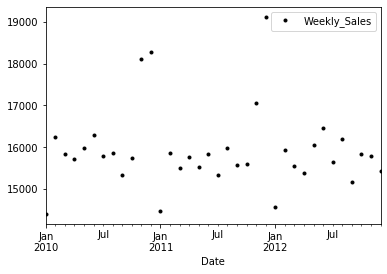

In [33]:
df.resample('M').mean().plot(style='k.')

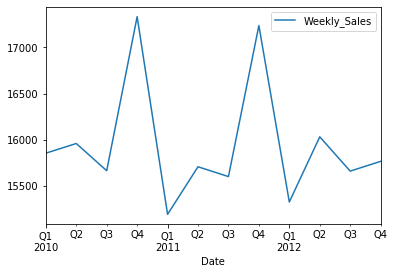

In [34]:
df.resample('Q').mean().plot()

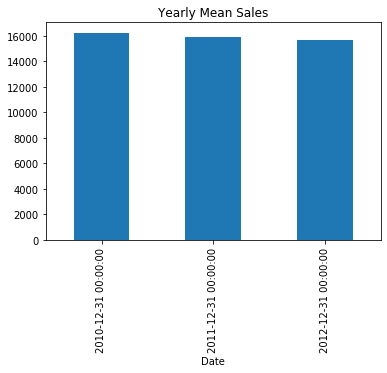

In [35]:
df['Weekly_Sales'].resample('A').mean().plot.bar(title='Yearly Mean Sales');

In [36]:
df = df.resample('M').mean()
df.head()

,Weekly_Sales
Date,
2010-01-31,14391.780535
2010-02-28,16246.155347
2010-03-31,15828.998553
2010-04-30,15703.564733
2010-05-31,15970.679466


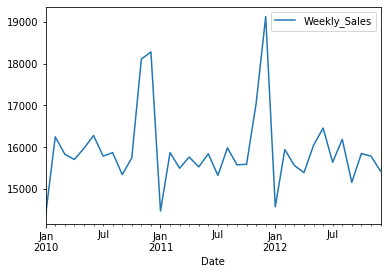

In [37]:
df.plot()

### ETS Decomposition

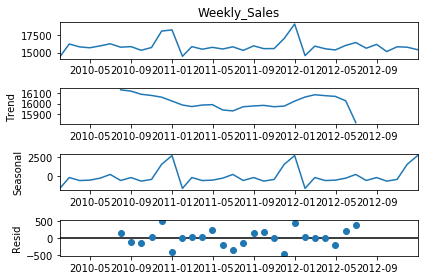

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Weekly_Sales'], model='additive')
result.plot();

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [41]:
adf_test(df['Weekly_Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.942554e+00
p-value                 2.243081e-07
# lags used             0.000000e+00
# observations          3.500000e+01
critical value (1%)    -3.632743e+00
critical value (5%)    -2.948510e+00
critical value (10%)   -2.613017e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


**In this case our p-value is very low at 2.243081e-07, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary.**

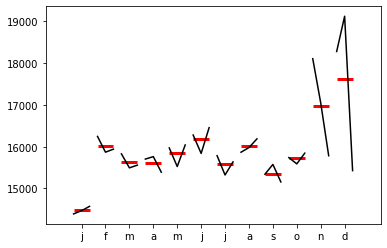

In [42]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

month_plot(df['Weekly_Sales']);

**During December month, the sales is highest.**

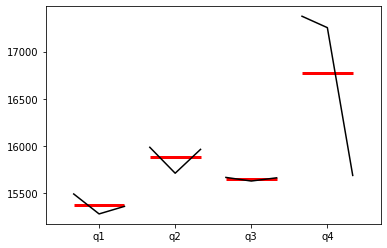

In [43]:
dfq = df['Weekly_Sales'].resample(rule='Q').mean()

quarter_plot(dfq);

**In the fourth quarter of the year, the sales is high.**

In [44]:
df.reset_index().head()

,Date,Weekly_Sales
0,2010-01-31,14391.780535
1,2010-02-28,16246.155347
2,2010-03-31,15828.998553
3,2010-04-30,15703.564733
4,2010-05-31,15970.679466


## Using Statsmodels to get the trend

The Hodrick-Prescott filter separates a time-series into a trend component and a cyclical component. 𝜆  is a smoothing parameter

In [45]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
sales_cycle, sales_trend = hpfilter(df['Weekly_Sales'], lamb=129600)

Lambda value for quarterly data is 1600.

Lambda value for annual data is 6.25.

Lambda value for monthly data is 129600

In [46]:
sales_cycle.head()

Date
2010-01-31   -1533.855833
2010-02-28     320.072707
2010-03-31     -97.518525
2010-04-30    -223.365580
2010-05-31      43.367236
Freq: M, Name: Weekly_Sales_cycle, dtype: float64

In [47]:
sales_trend.head()

Date
2010-01-31    15925.636368
2010-02-28    15926.082640
2010-03-31    15926.517077
2010-04-30    15926.930313
2010-05-31    15927.312231
Freq: M, Name: Weekly_Sales_trend, dtype: float64

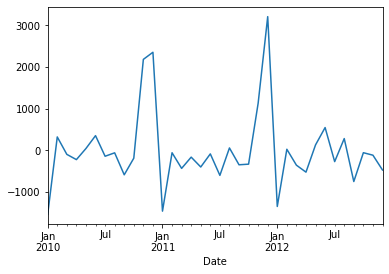

In [48]:
sales_cycle.plot()

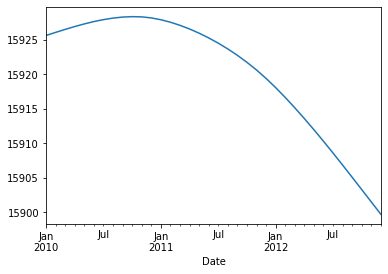

In [49]:
sales_trend.plot()

**There is an upward trend from 2010 to 2011. From 2011 there is a downward trend.**

In [50]:
df['trend'] = sales_trend

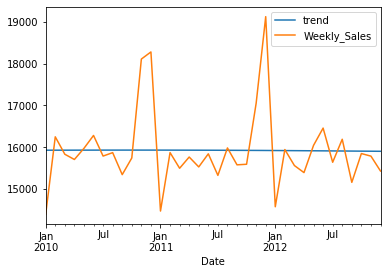

In [51]:
df[['trend','Weekly_Sales']].plot().autoscale(axis='x',tight=True);

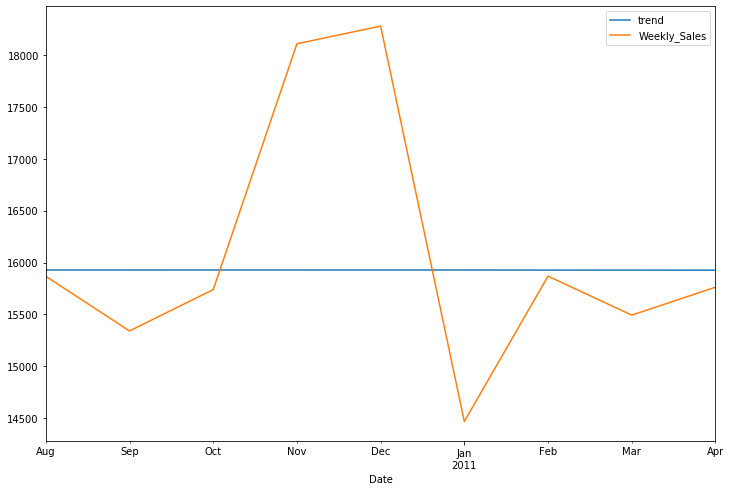

In [52]:
df[['trend','Weekly_Sales']]['2010-08':'2011-04'].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Autoregressive Model

In [53]:
from statsmodels.tsa.ar_model import AR,ARResults

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
len(df)

36

In [56]:
train = df.iloc[:24]
test = df.iloc[24:]

In [57]:
model = AR(train['Weekly_Sales'])

In [58]:
ARfit = model.fit(method='mle')

In [59]:
ARfit.params

const              35120.198759
L1.Weekly_Sales        0.220358
L2.Weekly_Sales       -0.470108
L3.Weekly_Sales       -0.156271
L4.Weekly_Sales       -0.117170
L5.Weekly_Sales       -0.376784
L6.Weekly_Sales        0.076976
L7.Weekly_Sales       -0.348954
L8.Weekly_Sales       -0.022073
dtype: float64

In [60]:
start = len(train)
end = len(train)+len(test)-1

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
predictions = ARfit.predict(start,end)
predictions

2012-01-31    16346.504462
2012-02-29    14906.878843
2012-03-31    15145.345834
2012-04-30    15643.184704
2012-05-31    15526.440836
2012-06-30    16093.616259
2012-07-31    15741.128871
2012-08-31    16078.620954
2012-09-30    16638.133964
2012-10-31    16622.269630
2012-11-30    15942.627414
2012-12-31    15879.560934
Freq: M, dtype: float64

In [63]:
predictions = predictions.rename("AR Predictions")

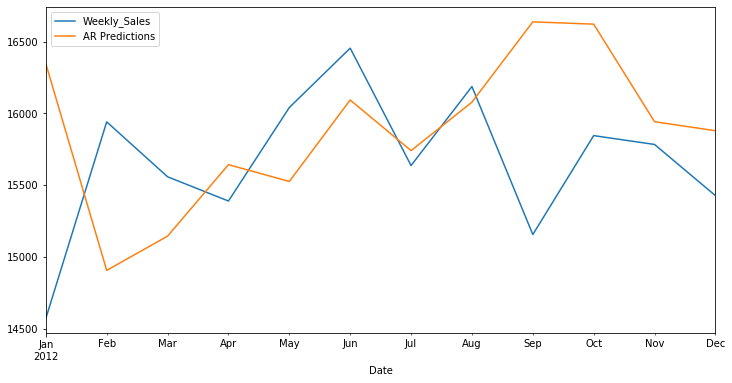

In [64]:
test['Weekly_Sales'].plot(legend=True)
predictions.plot(legend=True,figsize=(12,6));

In [65]:
error = mean_squared_error(test['Weekly_Sales'],predictions)

In [66]:
print(np.sqrt(error))

811.3212998704861


#### Forecasting for 2013

In [67]:
model = AR(df['Weekly_Sales'])

ARfit = model.fit()

forecasted_vales = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

In [68]:
df.tail()

,Weekly_Sales,trend
Date,,
2012-08-31,16187.573457,15906.830410
2012-09-30,15156.549317,15905.060389
2012-10-31,15845.658234,15903.277183
2012-11-30,15784.015806,15901.485785
2012-12-31,15427.596739,15899.690744


In [69]:
forecasted_vales

2013-01-31    16222.782148
2013-02-28    16650.435003
2013-03-31    15906.903607
2013-04-30    16299.628127
2013-05-31    16046.359849
2013-06-30    15922.699079
2013-07-31    16000.270084
2013-08-31    15944.460822
2013-09-30    15795.692828
2013-10-31    16004.931973
2013-11-30    15844.642076
2013-12-31    16037.843985
2014-01-31    16074.778105
Freq: M, Name: Forecast, dtype: float64

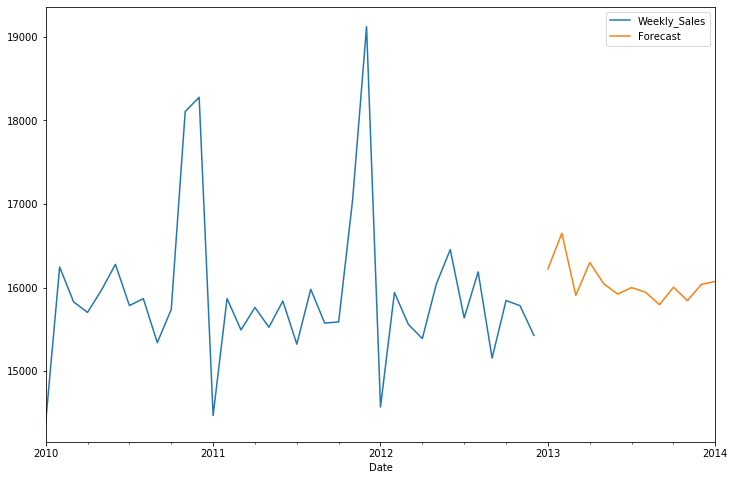

In [70]:
df['Weekly_Sales'].plot(figsize=(12,8),legend=True)
forecasted_vales.plot(legend=True)

In [71]:
df.drop(['trend'],axis=1,inplace=True)

- - -

## Moving Average

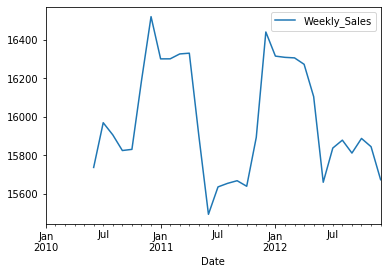

In [72]:
sales_ma = df.rolling(window=6).mean()
sales_ma.plot()

The graph is smoothened.

In [73]:
sales_base = pd.concat([df,df.shift(1)],axis=1)

In [74]:
sales_base.head()

,Weekly_Sales,Weekly_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16246.155347,14391.780535
2010-03-31,15828.998553,16246.155347
2010-04-30,15703.564733,15828.998553
2010-05-31,15970.679466,15703.564733


In [75]:
sales_base.columns=['Actual_Sales','Forecast_Sales']

In [76]:
sales_base.head()

,Actual_Sales,Forecast_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16246.155347,14391.780535
2010-03-31,15828.998553,16246.155347
2010-04-30,15703.564733,15828.998553
2010-05-31,15970.679466,15703.564733


In [77]:
sales_base.dropna()
sales_base.head()

,Actual_Sales,Forecast_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16246.155347,14391.780535
2010-03-31,15828.998553,16246.155347
2010-04-30,15703.564733,15828.998553
2010-05-31,15970.679466,15703.564733


In [78]:
sales_base.dropna(inplace=True)
sales_base.head()
#The changes are saved (becomes part of the dataset)

,Actual_Sales,Forecast_Sales
Date,,
2010-02-28,16246.155347,14391.780535
2010-03-31,15828.998553,16246.155347
2010-04-30,15703.564733,15828.998553
2010-05-31,15970.679466,15703.564733
2010-06-30,16278.713687,15970.679466


In [79]:
sales_base.tail()

,Actual_Sales,Forecast_Sales
Date,,
2012-08-31,16187.573457,15637.197314
2012-09-30,15156.549317,16187.573457
2012-10-31,15845.658234,15156.549317
2012-11-30,15784.015806,15845.658234
2012-12-31,15427.596739,15784.015806


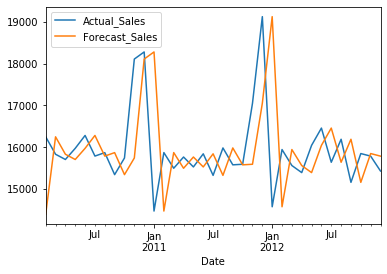

In [80]:
sales_base['Actual_Sales'].plot(legend=True)
sales_base['Forecast_Sales'].plot(legend=True)

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
sales_error = mean_squared_error(sales_base.Actual_Sales,sales_base.Forecast_Sales)

In [83]:
sales_error

1719830.3800707327

In [84]:
np.sqrt(sales_error)

1311.4230362742346

#### Root of mean squared error = 1311.423

- - -

## ARIMA Model
ACF= Autocorrelation Function
PACF= Partial Autocorrelation Function

ACF
The autocorrelation function (ACF). Intuitively, a stationary time series is defined by its mean, variance and ACF. A useful result is that any function of a stationary time series is also a stationary time series.

PACF
In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags.

**p = the number of autoregressive terms**

**d = the number of nonseasonal differences**

**q = the number of moving-average terms**

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

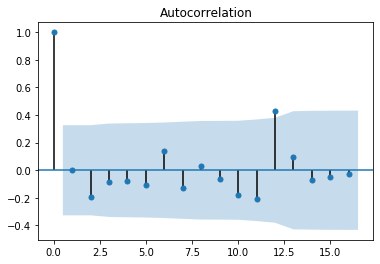

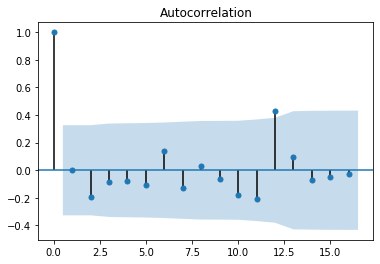

In [86]:
plot_acf(df)

In [87]:
df.head()

,Weekly_Sales
Date,
2010-01-31,14391.780535
2010-02-28,16246.155347
2010-03-31,15828.998553
2010-04-30,15703.564733
2010-05-31,15970.679466


The autocorrelation is plotted. At x=0, The correlation between the first term (14391.780535 and 14391.780535) is 1. Similarly the other plots are computed. 


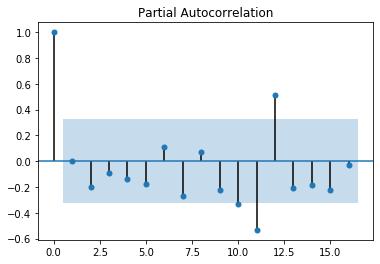

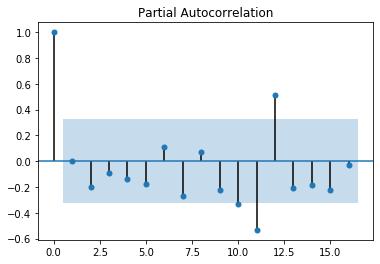

In [88]:
plot_pacf(df)

In [89]:
from statsmodels.tsa.arima_model import ARIMA

In [90]:
n = df.size
#Taking 70% of the data as training data and 30% as testing data

In [91]:
m = int(0.7*n)
m

25

Taking 70% of the data as training data and 30% as testing data
Train_data is the first 25 values. The test_data is the last 11 values.


In [92]:
train = df[0:m] #First 25 values
test = df[m:] #Remaining 11 values

In [93]:
#sales_model = ARIMA(sales_train,order=(p,d,q))
#In order to find the optimal p,d,q by trial and error method, itertools is imported. 

In [94]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq
#The range is fixed from 0 to 5. 
#At p=2, d=2, q=1 . The model_fit.aic is found to be 410.29


In [95]:
sales_model = ARIMA(train,order=(2,2,1))

In [96]:
sales_model_fit = sales_model.fit()

In [97]:
sales_model_fit.aic

410.08796717496074

In [98]:
sales_forecast = sales_model_fit.forecast(steps=11)[0]
sales_forecast

array([15646.05415599, 17519.25019164, 16157.15302749, 15843.73558196,
       16685.10216112, 16455.20003772, 16110.80613127, 16349.18098115,
       16367.33586803, 16175.38832225, 16176.96628021])

In [99]:
np.sqrt(mean_squared_error(test,sales_forecast))

836.4025159864022

The error is squared so that all negative values will become positive. The reason why the modulus of the difference is not computed is because, in MSA, if the difference is high, it gets highlighted as the value gets squared. 


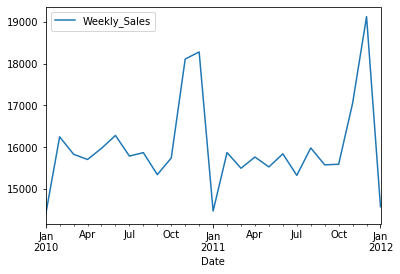

In [100]:
train.plot()

In [101]:
test.values

array([[15941.37082407],
       [15558.83018812],
       [15390.01597476],
       [16041.4083191 ],
       [16454.96765974],
       [15637.19731448],
       [16187.57345699],
       [15156.54931688],
       [15845.6582337 ],
       [15784.01580558],
       [15427.59673913]])

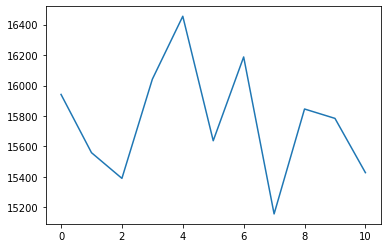

In [102]:
plt.plot(test.values)

In [103]:
sales_forecast

array([15646.05415599, 17519.25019164, 16157.15302749, 15843.73558196,
       16685.10216112, 16455.20003772, 16110.80613127, 16349.18098115,
       16367.33586803, 16175.38832225, 16176.96628021])

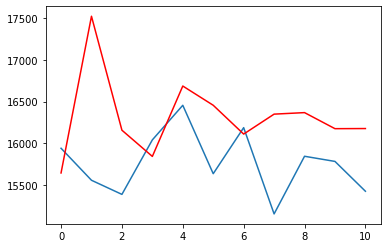

In [104]:
plt.plot(test.values)
plt.plot(sales_forecast,color='red')

Visually, the model is satisfactory to some extent and there is a scope of improvement.


**Error in AR model = 811.321**

**Error in Baseline model = 1311.423**

**Error in ARIMA model = 836.402**



## Forecasting using fb Prophet

In [105]:
df.head()

,Weekly_Sales
Date,
2010-01-31,14391.780535
2010-02-28,16246.155347
2010-03-31,15828.998553
2010-04-30,15703.564733
2010-05-31,15970.679466


In [106]:
df.reset_index(inplace=True)

In [107]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2010-01-31,14391.780535
1,2010-02-28,16246.155347
2,2010-03-31,15828.998553
3,2010-04-30,15703.564733
4,2010-05-31,15970.679466


## Create and Fit Model

In [108]:
from fbprophet import Prophet

m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

In [109]:
future = m.make_future_dataframe(freq='M',periods=12)

In [110]:
future.tail()

,ds
43,2013-08-31
44,2013-09-30
45,2013-10-31
46,2013-11-30
47,2013-12-31


In [111]:
len(df)

36

In [112]:
len(future)

48

### Step 2: Predict and fill in the Future

In [113]:
forecast = m.predict(future)

In [114]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,15915.634858,14553.972280,15354.928257,15915.634858,15915.634858,-970.331954,-970.331954,-970.331954,-970.331954,-970.331954,-970.331954,0.0,0.0,0.0,14945.302904
1,2010-02-28,15915.715039,15569.717803,16350.717537,15915.715039,15915.715039,42.312932,42.312932,42.312932,42.312932,42.312932,42.312932,0.0,0.0,0.0,15958.027970
2,2010-03-31,15915.803810,15210.327551,15972.732551,15915.803810,15915.803810,-304.764483,-304.764483,-304.764483,-304.764483,-304.764483,-304.764483,0.0,0.0,0.0,15611.039326
3,2010-04-30,15915.889717,15298.474690,16097.191646,15915.889717,15915.889717,-224.706347,-224.706347,-224.706347,-224.706347,-224.706347,-224.706347,0.0,0.0,0.0,15691.183370
4,2010-05-31,15915.978488,15489.423739,16305.333935,15915.978488,15915.978488,-33.571873,-33.571873,-33.571873,-33.571873,-33.571873,-33.571873,0.0,0.0,0.0,15882.406615


In [115]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2013-08-31,14344.986687,14207.667469,14991.332139,14269.787986,14423.697212,268.932145,268.932145,268.932145,268.932145,268.932145,268.932145,0.0,0.0,0.0,14613.918832
44,2013-09-30,14248.015363,13455.413181,14256.018122,14158.768607,14344.129897,-404.601694,-404.601694,-404.601694,-404.601694,-404.601694,-404.601694,0.0,0.0,0.0,13843.413668
45,2013-10-31,14147.811662,14008.416090,14816.651995,14041.881929,14261.527431,236.647367,236.647367,236.647367,236.647367,236.647367,236.647367,0.0,0.0,0.0,14384.459029
46,2013-11-30,14050.840338,14876.435036,15703.565212,13929.403993,14184.452269,1203.438123,1203.438123,1203.438123,1203.438123,1203.438123,1203.438123,0.0,0.0,0.0,15254.278461
47,2013-12-31,13950.636637,14995.812452,15815.737813,13808.967073,14099.328362,1455.222869,1455.222869,1455.222869,1455.222869,1455.222869,1455.222869,0.0,0.0,0.0,15405.859506


In [116]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [117]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2013-08-31,14613.918832,14207.667469,14991.332139
44,2013-09-30,13843.413668,13455.413181,14256.018122
45,2013-10-31,14384.459029,14008.416090,14816.651995
46,2013-11-30,15254.278461,14876.435036,15703.565212
47,2013-12-31,15405.859506,14995.812452,15815.737813


### Plotting Forecast

We can use Prophet's own built in plotting tools

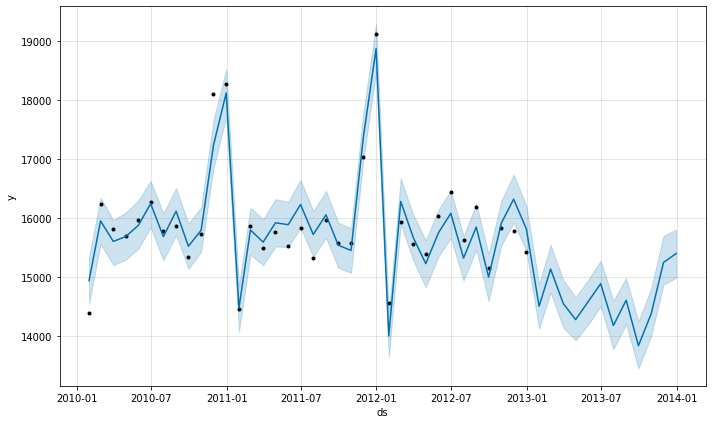

In [118]:
m.plot(forecast);

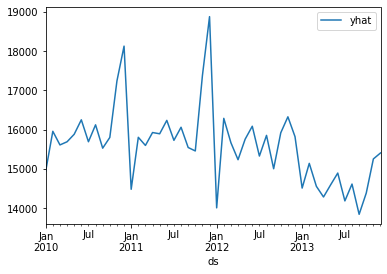

In [119]:
forecast.plot(x='ds',y='yhat')

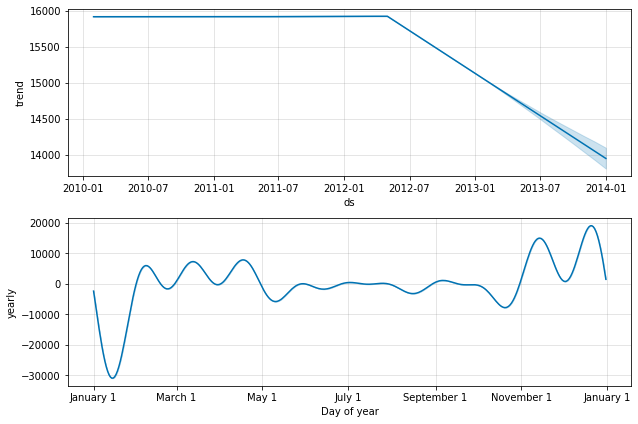

In [120]:
m.plot_components(forecast);